<a href="https://colab.research.google.com/github/riazahmedmahin/Thesiss/blob/main/orange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import os

In [ ]:
# Define the paths to the training and testing directories
train_dir = '/content/drive/MyDrive/Orange/train'
test_dir = '/content/drive/MyDrive/Orange/test'

# Define the data generators for the training and testing datasets
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Load the training and testing datasets
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')

Found 991 images belonging to 4 classes.
Found 99 images belonging to 4 classes.


In [ ]:
# Define the data augmentation pipeline
data_augmentation = keras.Sequential([
    keras.layers.RandomFlip('horizontal'),
    keras.layers.RandomRotation(0.2),
    keras.layers.RandomZoom(0.2)
])

In [ ]:
# Load the pre-trained VGG16 model
base_model = keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the weights of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Add a new classification layer on top of the pre-trained model
x = base_model.output
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(128, activation='relu')(x)
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.Dense(4, activation='softmax')(x)

# Define the new model
model = keras.Model(inputs=base_model.input, outputs=x)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 24,350,414 (92.89 MB)

 Trainable params: 17,926,596 (68.38 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,423,818 (24.50 MB)

In [ ]:
# Define the early stopping callback
early_stopping = keras.callbacks.EarlyStopping(patience=5)

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    callbacks=[early_stopping]
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


31/31 ━━━━━━━━━━━━━━━━━━━━ 838s 25s/step - accuracy: 0.6457 - loss: 1.2395 - val_accuracy: 0.8788 - val_loss: 0.2317
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 773s 24s/step - accuracy: 0.9260 - loss: 0.1764 - val_accuracy: 0.9293 - val_loss: 0.1540
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 789s 24s/step - accuracy: 0.9466 - loss: 0.1232 - val_accuracy: 0.9091 - val_loss: 0.1832
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 732s 24s/step - accuracy: 0.9770 - loss: 0.0612 - val_accuracy: 0.9192 - val_loss: 0.2053
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 717s 23s/step - accuracy: 0.9816 - loss: 0.0519 - val_accuracy: 0.9293 - val_loss: 0.1192
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 717s 23s/step - accuracy: 0.9939 - loss: 0.0314 - val_accuracy: 0.9495 - val_loss: 0.1315
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 769s 24s/step - accuracy: 0.9846 - loss: 0.0438 - val_accuracy: 0.8990 - val_loss: 0.2494
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 742s 24s/step - accuracy: 0.9867 - loss: 0.0396 - val_accuracy: 0.9394 - val_

In [ ]:
loss , acc = model.evaluate(test_generator)

4/4 ━━━━━━━━━━━━━━━━━━━━ 66s 14s/step - accuracy: 0.9165 - loss: 0.1643


In [ ]:
# Evaluate the model on the testing dataset
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc:.2f}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 65s 15s/step - accuracy: 0.9321 - loss: 0.1539
Test accuracy: 0.93


In [ ]:
# Get the predicted labels
y_pred = model.predict(test_generator)
y_pred_class = np.argmax(y_pred, axis=1)

# Print the classification report and confusion matrix
print(classification_report(test_generator.classes, y_pred_class))
print(confusion_matrix(test_generator.classes, y_pred_class))

4/4 ━━━━━━━━━━━━━━━━━━━━ 77s 15s/step
              precision    recall  f1-score   support

           0       0.29      0.27      0.28        22
           1       0.24      0.27      0.26        22
           2       0.29      0.27      0.28        33
           3       0.09      0.09      0.09        22

    accuracy                           0.23        99
   macro avg       0.23      0.23      0.23        99
weighted avg       0.23      0.23      0.23        99

[[ 6  6  4  6]
 [ 5  6  6  5]
 [ 7  8  9  9]
 [ 3  5 12  2]]


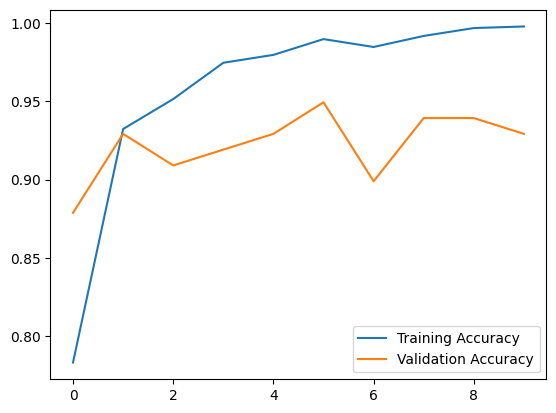

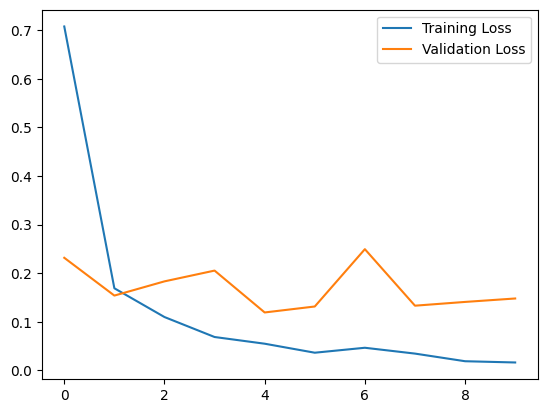

In [ ]:
# Plot the training and validation accuracy and loss
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [ ]:
# Save the model
model.save('orange_disease_classification_model.h5')

In [ ]:
# Load the pre-trained DenseNet model
densenet_base_model = keras.applications.DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the weights of the pre-trained model
for layer in densenet_base_model.layers:
    layer.trainable = False

# Add a new classification layer on top of the pre-trained model
x = densenet_base_model.output
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(128, activation='relu')(x)
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.Dense(4, activation='softmax')(x)

# Define the DenseNet model
densenet_model = keras.Model(inputs=densenet_base_model.input, outputs=x)

# Compile the DenseNet model
densenet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Train the DenseNet model
history_densenet = densenet_model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    callbacks=[early_stopping]
)

# Evaluate the DenseNet model on the testing dataset
test_loss_densenet, test_acc_densenet = densenet_model.evaluate(test_generator)
print(f'Test accuracy (DenseNet): {test_acc_densenet:.2f}')

Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 291s 8s/step - accuracy: 0.6117 - loss: 6.4194 - val_accuracy: 0.9495 - val_loss: 0.1742
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 237s 7s/step - accuracy: 0.9721 - loss: 0.1751 - val_accuracy: 0.9495 - val_loss: 0.1891
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 219s 7s/step - accuracy: 0.9783 - loss: 0.0581 - val_accuracy: 0.9697 - val_loss: 0.1487
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 271s 7s/step - accuracy: 0.9823 - loss: 0.0725 - val_accuracy: 0.9697 - val_loss: 0.1351
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 226s 7s/step - accuracy: 0.9880 - loss: 0.0368 - val_accuracy: 0.9697 - val_loss: 0.1003
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 228s 7s/step - accuracy: 0.9946 - loss: 0.0305 - val_accuracy: 0.9697 - val_loss: 0.0805
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 262s 7s/step - accuracy: 0.9952 - loss: 0.0190 - val_accuracy: 0.9798 - val_loss: 0.0490
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 276s 8s/step - accuracy: 0.9971 - loss: 0.0147 - val_accuracy: 0.9899 - v

In [ ]:
# Evaluate the DenseNet model on the testing dataset
test_loss_densenet, test_acc_densenet = densenet_model.evaluate(test_generator)
print(f'Test accuracy (DenseNet): {test_acc_densenet:.2f}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 28s 5s/step - accuracy: 0.9690 - loss: 0.1120
Test accuracy (DenseNet): 0.98


In [ ]:

# Get the predicted labels for the DenseNet model
y_pred_densenet = densenet_model.predict(test_generator)
y_pred_class_densenet = np.argmax(y_pred_densenet, axis=1)

# Print the classification report and confusion matrix for the DenseNet model
print(classification_report(test_generator.classes, y_pred_class_densenet))
print(confusion_matrix(test_generator.classes, y_pred_class_densenet))

4/4 ━━━━━━━━━━━━━━━━━━━━ 43s 6s/step
              precision    recall  f1-score   support

           0       0.27      0.27      0.27        22
           1       0.18      0.18      0.18        22
           2       0.27      0.27      0.27        33
           3       0.09      0.09      0.09        22

    accuracy                           0.21        99
   macro avg       0.20      0.20      0.20        99
weighted avg       0.21      0.21      0.21        99

[[ 6  6  7  3]
 [ 2  4  8  8]
 [11  4  9  9]
 [ 3  8  9  2]]


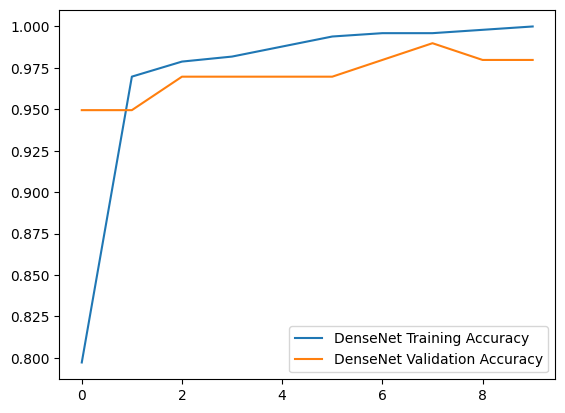

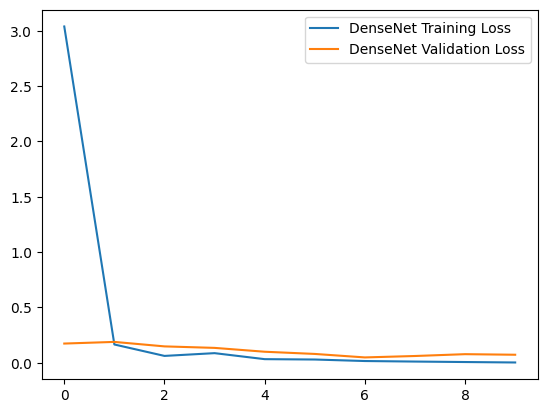

In [ ]:
# Plot the training and validation accuracy and loss for both models
plt.plot(history_densenet.history['accuracy'], label='DenseNet Training Accuracy')
plt.plot(history_densenet.history['val_accuracy'], label='DenseNet Validation Accuracy')
plt.legend()
plt.show()

plt.plot(history_densenet.history['loss'], label='DenseNet Training Loss')
plt.plot(history_densenet.history['val_loss'], label='DenseNet Validation Loss')
plt.legend()
plt.show()

In [ ]:

# Save the DenseNet model
densenet_model.save('densenet_orange_disease_classification_model.h5')